<a href="https://colab.research.google.com/github/qmeng222/CNN/blob/main/convolution/Conv2d.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [ ]:
# parameters:
inChans  = 3 # RGB
outChans = 15 # 15 feature maps (15 diff kernels, each 5x5)
krnSize  = 5 # should be an odd number
stride   = 1 # step size = 1 -> no stride
padding  = 0 # no paddding

# c is an instance of 2D convolution class:
c = nn.Conv2d(inChans,outChans,krnSize,stride,padding)
print(c, "\n")
print( 'Size of weights: ' + str(c.weight.shape) )
print( 'Size of bias: ' + str(c.bias.shape) )

Conv2d(3, 15, kernel_size=(5, 5), stride=(1, 1)) 

Size of weights: torch.Size([15, 3, 5, 5])
Size of bias: torch.Size([15])


👆 Interpretations:
- Conv2d(3, 15, kernel_size=(5, 5), stride=(1, 1)): 3 input channels, 15 output channels, convolution kernel 5x5, step size = 1 for both rows and cols (symmetric)
- weights torch size [15, 3, 5, 5]: 15 output channels, 3 input channels, 5x5 kernels
- each convolution kernel has its own bias

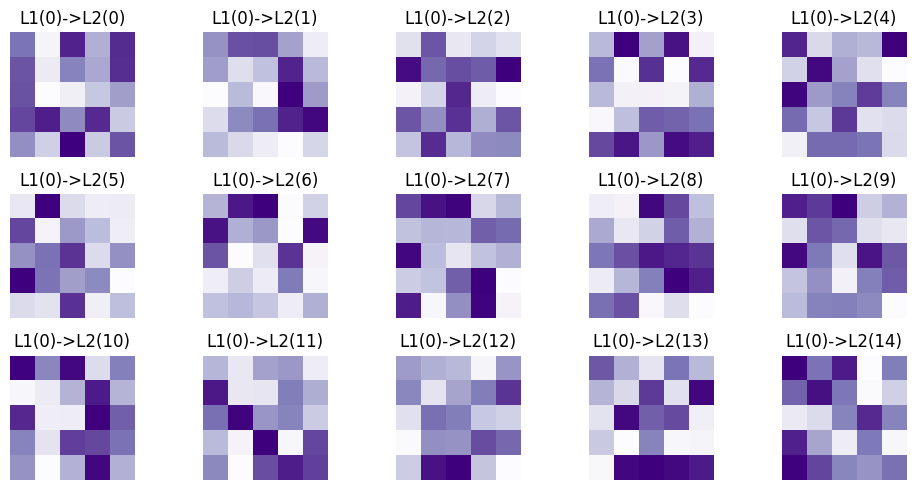

In [ ]:
# visualize all 15 kernels:

fig,axs = plt.subplots(3,5,figsize=(10,5))

for i,ax in enumerate(axs.flatten()):
  ax.imshow(torch.squeeze(c.weight[i,0,:,:]).detach(),cmap='Purples') # 1st channel (R) only
  ax.set_title('L1(0)->L2(%s)'%i)
  ax.axis('off')

plt.tight_layout()
plt.show()

# Convolve with an image:

torch.Size([1, 3, 64, 64])
(64, 64, 3, 1)


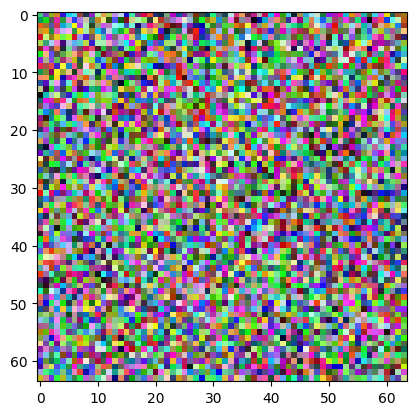

In [ ]:
# size of the image (N, RGB, H, W)
imsize = (1,3,64,64) # 1 img, 3 RGB channels

img = torch.rand(imsize)

# pytorch wants channels first, but matplotlib wants channels last, therefore, tensors must be permuted to visualize:
img2view = img.permute(2,3,1,0).numpy() # (2, 3, 1, 0) -> (H, W, RGB, N)
print(img.shape)
print(img2view.shape)

plt.imshow(np.squeeze(img2view));

In [ ]:
# convolve the image with the filter bank (set of 'outChans' kernels):

convRes = c(img)
print(img.shape) # input shape
print(convRes.shape) # output shape

torch.Size([1, 3, 64, 64])
torch.Size([1, 15, 60, 60])


👆 Interpretation:
- kernels 5x5
- 5 // 2= 2
- 2 pixels on each edge are passed
- therefore 64 -> 60
- matches the size from formula: (64+0-5)/1 + 1 = 60

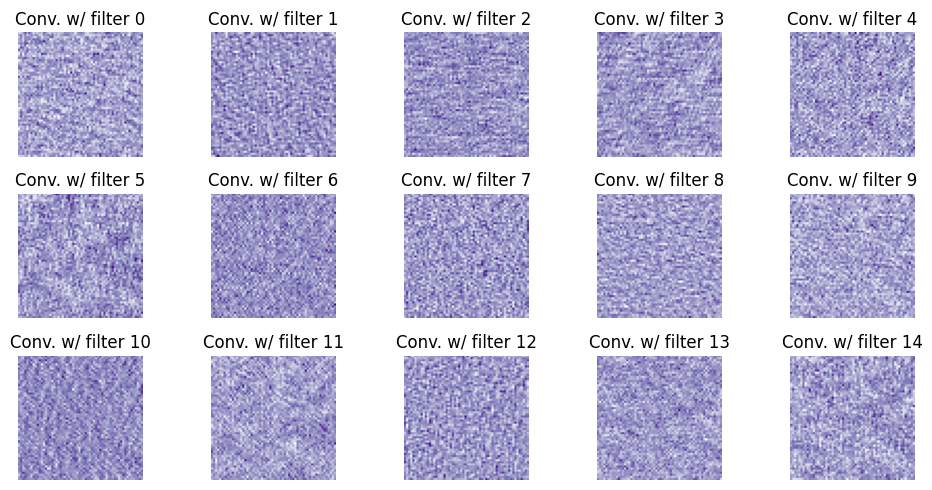

In [ ]:
# visualize the feature maps:

fig,axs = plt.subplots(3,5,figsize=(10,5))

for i,ax in enumerate(axs.flatten()):

  # extract this "layer" of the convolution result
  I = torch.squeeze(convRes[0,i,:,:]).detach() # only 1 image

  # and visualize it
  ax.imshow(I,cmap='Purples')
  ax.set_title('Conv. w/ filter %s'%i)
  ax.axis('off')

plt.tight_layout()
plt.show()